<a href="https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Ml_Pipelining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [0]:
#Defining a pipeline observing the effects of PCA and classifier regularization

logistic = SGDClassifier(loss = 'log', early_stopping=True,max_iter = 10000, tol=1e-5, random_state=0)

pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [0]:
#load the datasets 

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [0]:
#grid search for the parameters



In [21]:
param_grid = {
    'pca__n_components': [5, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5,
                      return_train_score=False)
search.fit(X_digits, y_digits)

print("best parameter (CV Score = {})".format(search.best_params_) )

best parameter (CV Score = {'logistic__alpha': 0.01, 'pca__n_components': 64})


In [22]:
pca.fit(X_digits)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

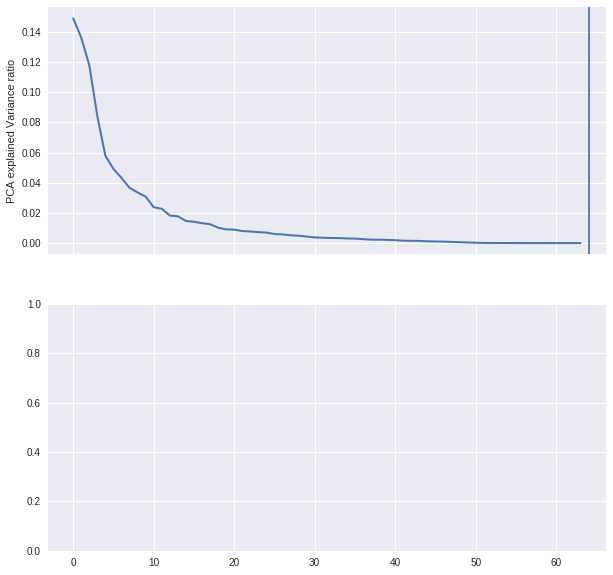

In [27]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize =(10,10))

ax0.plot(pca.explained_variance_ratio_, linewidth = 2)
ax0.set_ylabel('PCA explained Variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components)